<a href="https://colab.research.google.com/github/natanwondi21/Random_Walk_Mobility/blob/master/random_walk_mobility_sim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Probability of a node reaching a target_position in simulation_time:  0.2
Average time to reach the target_point:  701.0


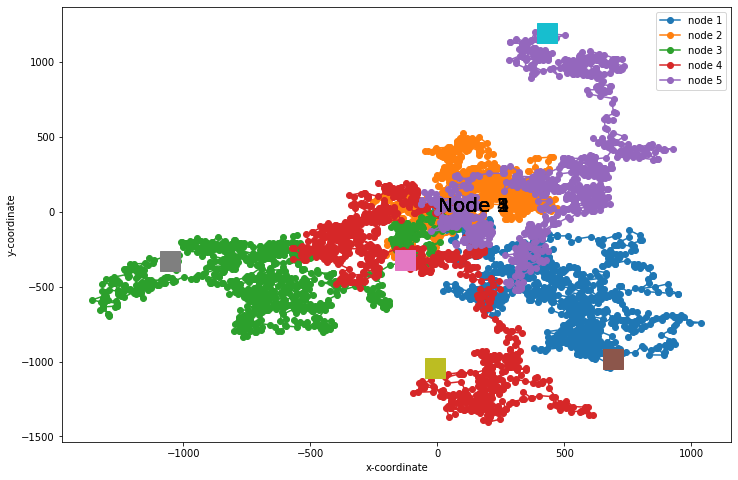

In [1]:

"""# Code for Project"""

# Importing packages
import numpy as np

import math
import random as rnd

import matplotlib.pyplot as plt


#### Initalization ##########

simulation_time = 1000
number_of_nodes = 5

v_min = 0  # mph. Minimum velocity
v_max = 60  # mph. Maximum velocity

angle_min = 0  # min angle in degree.
angle_max = 359  # max angle in degree.

region_x = 100  # in meter
region_y = 100  # in meter

t = 1  # 1 minute difference.


# The x-coordinates of all the users.. initialize with zero for all the time instance
nodes_position_x = [[0 for _ in range(simulation_time)]
                    for _ in range(number_of_nodes)]
# The y-coordinates of all the users.. initialize with zero for all the time instance
nodes_position_y = [[0 for _ in range(simulation_time)]
                    for _ in range(number_of_nodes)]

node_tracker = [False for _ in range(number_of_nodes)]  # This variable
number_of_reached_nodes = 0  # This is to count the number of reached nodes

# This is the keep track when a node first reached the target_position
nodes_time_reach_target_node = [0 for _ in range(number_of_nodes)]

target_position = [100, 200]


def mobility(point1):  # I am putting all the codes in a function.

    # generate a random velocity

    v_t = rnd.randint(v_min, v_max)

    # Gnerate a random angle.

    angle_deg = rnd.randint(angle_min, angle_max)
    #print("Generated random angle: ", angle_deg, "degree")

    # we need to convert the degree to radian as build-in functions in python work with radian

    angle_rad = math.radians(angle_deg)

    # for sin and cos, python has sin() and cos() functions in math package

    sine = math.sin(angle_rad)
    cosine = math.cos(angle_rad)

    # compute the distance

    dist1 = v_t*t

    x_new = point1[0] + dist1*cosine
    y_new = point1[1] + dist1*sine

    point2 = [x_new, y_new]

    return point2


def main():
    # The main idea is to run the code for simulation_time and update the position of each node every time.
    for time_instance in range(1, simulation_time):
        for node in range(number_of_nodes):
            node_current_x = nodes_position_x[node][time_instance-1]
            node_current_y = nodes_position_y[node][time_instance-1]

            initial_poisition = [node_current_x, node_current_y]

            new_position = mobility(initial_poisition)

            # Compute the distance between the new_position and target_position
            distance = math.sqrt(
                (new_position[0] - target_position[0])**2 + (new_position[1] - target_position[1])**2)
            if distance <= 5:


                # update the node_traker variable, number_of_reached_nodes ,and nodes_time_reach_target_node.
                global number_of_reached_nodes

                if node_tracker[node] == False:
                    node_tracker[node] = True
                    number_of_reached_nodes += 1
                    nodes_time_reach_target_node[node] = time_instance



            nodes_position_x[node][time_instance] = new_position[0]
            nodes_position_y[node][time_instance] = new_position[1]


def plotter():
    #plt.plot(nodes_position_x[1][:], nodes_position_y[1][:])
    plt.figure(figsize=(12, 8))

    # plot all positiions except initial and ending positions of all the nodes
    for node in range(number_of_nodes):
        plt.plot(nodes_position_x[node][:], nodes_position_y[node][:], '-o')

    # plot the initial position of each node
    for node in range(number_of_nodes):
        plt.text(nodes_position_x[node][0]+3, nodes_position_y[node]
                 [0], 'Node '+str(node+1), fontsize=20)

    # plot the last position of each node
    for node in range(number_of_nodes):
        plt.plot(nodes_position_x[node][-1],
                 nodes_position_y[node][-1], 's', markersize=20)
        #plt.text(nodes_position_x[node][-1]+3, nodes_position_y[node][-1],'Node '+str(node+1)+' Ends', fontsize = 20)

    plt.legend(["node "+str(node+1) for node in range(number_of_nodes)])
    plt.xlabel('x-coordinate')
    plt.ylabel('y-coordinate')


def calculator():


    global number_of_reached_nodes

    Pr = number_of_reached_nodes/number_of_nodes

    if number_of_reached_nodes == 0:
        Avg = 0
    else:
        Avg = np.sum(nodes_time_reach_target_node) / number_of_reached_nodes
    # Inlcuding, probability of a node reaching a target_position in simulation_time = number_of_reached_nodes/number_of_nodes
    # and average time to reach the target_point = sum of the values in nodes_time_reach_target_node / number_of_reached_node

    print("Probability of a node reaching a target_position in simulation_time: ", Pr)
    print("Average time to reach the target_point: ", Avg)


main()
plotter()
calculator()

